# XGBoost에는 Python Wrapper와 SKlearn Wrapper가 있다.

In [1]:
conda install -c anaconda py-xgboost

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.3
  latest version: 4.14.0

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /home/studio-lab-user/.conda/envs/default

  added / updated specs:
    - py-xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _py-xgboost-mutex-2.0      |            cpu_0           9 KB  anaconda
    blas-1.0                   |              mkl           6 KB  anaconda
    ca-certificates-2022.07.19 |       h06a4308_0         131 KB  anaconda
    intel-openmp-2021.4.0      |    h06a4308_3561         8.8 MB  anaconda
    joblib-1.1.0               |     pyhd3eb1b0_0         211 KB  anaconda
    libgfortran-ng-7.5.0       |      ha8ba4b0_17          22 KB  anaconda
    libgfortran4-7.5.0         |      ha8ba4b0_17         1.3 MB  anaconda
  

In [1]:
import xgboost as xgb
from xgboost import XGBClassifier

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
import xgboost
print(xgboost.__version__)

1.5.0


In [3]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
X_features = dataset.data
y_label = dataset.target

In [5]:
cancer_df = pd.DataFrame(data=X_features, columns=dataset.feature_names)
cancer_df['target']=y_label
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [6]:
print(dataset.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
1    357
0    212
Name: target, dtype: int64


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label,
                                                    test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(455, 30) (114, 30)


In [8]:
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [9]:
params = {'max_depth':3,
          'eta': 0.1,
          'objective':'binary:logistic',
          'eval_metric':'logloss',
          'early_stoppings':100
         }
num_rounds = 400

In [10]:
wlist = [(dtrain, 'train'), (dtest, 'eval')]
xgb_model = xgb.train(params = params, dtrain=dtrain, num_boost_round=num_rounds,\
                      early_stopping_rounds = 100, evals=wlist)

[08:41:14] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:576: 
Parameters: { "early_stoppings" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-logloss:0.60961	eval-logloss:0.61443
[1]	train-logloss:0.54076	eval-logloss:0.54721
[2]	train-logloss:0.48407	eval-logloss:0.49559
[3]	train-logloss:0.43324	eval-logloss:0.44659
[4]	train-logloss:0.38984	eval-logloss:0.40682
[5]	train-logloss:0.35213	eval-logloss:0.37082
[6]	train-logloss:0.31949	eval-logloss:0.34032
[7]	train-logloss:0.29139	eval-logloss:0.31559
[8]	train-logloss:0.26606	eval-logloss:0.29181
[9]	train-logloss:0.24392	eval-logloss:0.27323
[10]	train-logloss:0.22408	eval-logloss:0.25490
[11]	train-logloss:0.20697	eval-logloss:0.24217
[12]

In [11]:
pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결괏값을 10개만 표시, 예측 확류값으로 표시됨')
print(np.round(pred_probs[:10], 3))

predict() 수행 결괏값을 10개만 표시, 예측 확류값으로 표시됨
[0.995 0.    0.    1.    1.    0.    0.001 0.065 0.346 1.   ]


In [12]:
preds = [ 1 if x>0.5 else 0 for x in pred_probs]
print(preds[:10])

[1, 0, 0, 1, 1, 0, 0, 0, 0, 1]


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

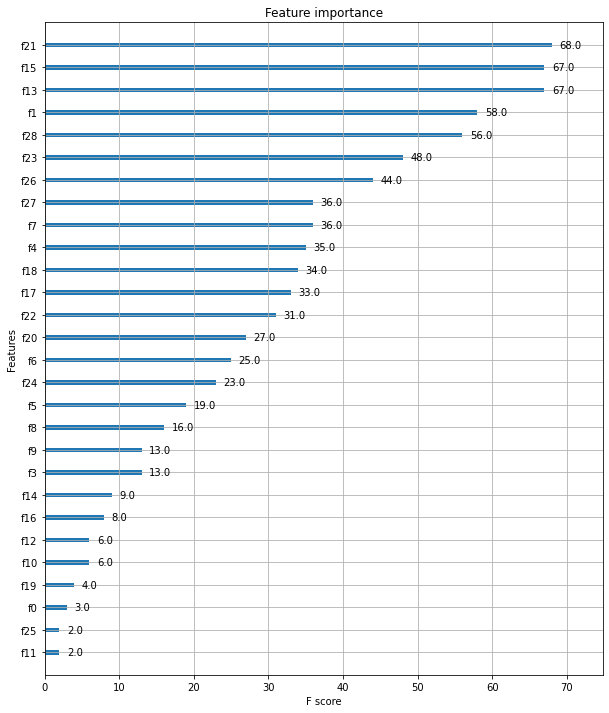

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_model, ax=ax)

In [15]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb_wrapper.fit(X_train, y_train)
w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

[08:50:59] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [17]:
from xgboost import XGBClassifier
xgb_wrapper = XGBClassifier(n_estimators=800, learning_rate=0.1, max_depth=3)
evals = [(X_test, y_test)]
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss",
                eval_set=evals, verbose=True)
ws100_preds = xgb_wrapper.predict(X_test)
ws100_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

[0]	validation_0-logloss:0.61443
[1]	validation_0-logloss:0.54721
[2]	validation_0-logloss:0.49559
[3]	validation_0-logloss:0.44659
[4]	validation_0-logloss:0.40682
[5]	validation_0-logloss:0.37082
[6]	validation_0-logloss:0.34032
[7]	validation_0-logloss:0.31559
[8]	validation_0-logloss:0.29181
[9]	validation_0-logloss:0.27323
[10]	validation_0-logloss:0.25490
[11]	validation_0-logloss:0.24217
[12]	validation_0-logloss:0.22577
[13]	validation_0-logloss:0.21283
[14]	validation_0-logloss:0.19947
[15]	validation_0-logloss:0.19169
[16]	validation_0-logloss:0.18069
[17]	validation_0-logloss:0.17432
[18]	validation_0-logloss:0.16573
[19]	validation_0-logloss:0.15517
[20]	validation_0-logloss:0.15131
[21]	validation_0-logloss:0.14297
[22]	validation_0-logloss:0.14038
[23]	validation_0-logloss:0.13659
[24]	validation_0-logloss:0.13153
[25]	validation_0-logloss:0.12885
[26]	validation_0-logloss:0.12498
[27]	validation_0-logloss:0.12312
[28]	validation_0-logloss:0.11902
[29]	validation_0-loglos

In [25]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('Confusion Matrix')
    print(confusion)
    print('Acuracy: {0:.4f}, precision: {1:.4f}, 재현율: {2:.4f},\
           AUC:{3:.4f}'.format(accuracy, precision, recall, roc_auc))
    

In [26]:
get_clf_eval(y_test, ws100_preds, ws100_pred_proba)

Confusion Matrix
[[41  2]
 [ 1 70]]
Acuracy: 0.9737, precision: 0.9722, 재현율: 0.9859,           AUC:0.9944
